<a href="https://colab.research.google.com/github/chajunhyeop/-/blob/main/ubion5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#신경망
##분류예측

In [4]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv",encoding = 'cp949')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [9]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [10]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [30]:
#분류예측

#변수선택
X = df[["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간", "구매금액대"]]
Y = df["할인민감여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간"]),
                        ("onehot", OneHotEncoder(sparse = False), ["구매금액대"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

#오버샘플링
from imblearn.over_sampling import SMOTE #Synthetic minority over-sampling techniqe

X_train, Y_train = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

In [27]:
#모델링
from sklearn.neural_network import MLPClassifier

In [31]:
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes = [50])

#모형 학습
nn_model.fit(X_train, Y_train)

#예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
# 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(train) : 0.889
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       177
           1       0.85      0.89      0.87       123

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [35]:
import numpy as np

#변수선택
X = df[df.이탈여부 == 0][["방문빈도", "총 할인 금액", "고객등급", "구매유형", "거래기간", "할인민감여부", "평균 구매주기"]]
Y = df[df.이탈여부 == 0]["1회 평균매출액"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["방문빈도", "총 할인 금액", "거래기간", "평균 구매주기"]),
                        ("onehot", OneHotEncoder(sparse = False), ["고객등급", "구매유형", "할인민감여부"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)


In [36]:
from sklearn.neural_network import MLPRegressor

#모델 생성
nn_reg_model = MLPRegressor(random_state = 0, alpha = 1, max_iter = 1000,
                            hidden_layer_sizes = [50,50])

#모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#결과값 보고
print("Y predict value : \n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

Y predict value : 
 [367567.22799569 291986.7171292  286542.39507057 470299.18982825
 199015.43022523 314985.16674704 120385.261673    99679.50744792
 217207.85032309 321283.5694424  322281.24636508 139031.08090941
 172479.30691299 307474.28058998 410674.7673535  282802.14200659
 314022.43590656 344082.61534343 266080.18516834 299527.46258462
 417918.96528793 213628.82138014 325703.16436337 276841.23973322
  83289.89193415 370306.40166324 392255.59988171 148021.81268408
 135257.54780785 288250.40948644 329672.79002503 409898.41100752
 238134.15585775 368306.05176262 275290.22641391 239081.40629288
 266321.69500888 375448.00373975 246605.1330584  641448.06611111
 336904.01756403 215252.99856889 241609.33155848 271063.86770618
 236907.37454933 382141.50786421 141280.68282403 289125.50608539
 298377.15265302 346302.09403242 253397.19897089 508363.2921946
  55430.52886374 316398.6845584  307992.35916116 291458.05176895
 365830.87156821 337348.7566333  283210.3790915  258622.02741059
 32137

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#딥러닝
##경고문 제거

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
#변수선택
X = df[["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간", "구매금액대"]]
Y = df["할인민감여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간"]),
                        ("onehot", OneHotEncoder(sparse = False), ["구매금액대"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

#오버샘플링
from imblearn.over_sampling import SMOTE #Synthetic minority over-sampling techniqe

X_train, Y_train = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

In [45]:
import keras
import tensorflow as tf

from keras.models import Sequential  #노드에 레이어가 생기는 데 신경망에는 레이어가 있다.
#그리고 노드가 있는데 이런 레이더들이 이어져서 아웃풋으로 이어진다.
#시퀀셜을 순차적으로 가는 것을 만드는 것이다.
from keras.layers import Dense, Activation#dense는 노드들의 수이다.
#노드의 밀도를 정해주는데 밀도가 높다는 것은 그 중에서 계산이 많다는 것이다.
from keras.metrics import Accuracy

#시드값 설정
np.random.seed(0)
tf.random.set_seed(0)

#모형생성
model = keras.models.Sequential()#순차적인 모형을 형성
model.add(keras.layers.Dense(64, input_dim=7, activation = "relu")) #레이어나 밀도를 추가한다.
#input dim= 7 -> 7차원의 신경망을 만들겠다. -> 밀도는 64이다. 하이퍼파라미터 지정 활성화함수 (activation)
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#모형학습
#불순도 확인 모델이 얼마나 불순도를 없앴는지, 불순도는 적합성과 반비례관계를 가진다.
#메트릭스는 적합도를 보여준다
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, 
                    batch_size = 64, verbose = 2)
#변수를 지정하기 위해서 지정 두개의 훈련셋을 넣어서 100번의 계산을 시도한다.
#1부터 시작 - 100까지 계산한다. 대신 계산이 오래걸림
#벤치 사이즈와 벌보스는 그냥 디폴트값으로 사용하면 된다. 
#적정한 에폭을 결정하는것이 중요하다.

Epoch 1/100
11/11 - 1s - loss: 0.6829 - accuracy: 0.5888 - val_loss: 0.6856 - val_accuracy: 0.6529 - 781ms/epoch - 71ms/step
Epoch 2/100
11/11 - 0s - loss: 0.5836 - accuracy: 0.8254 - val_loss: 0.6330 - val_accuracy: 0.6471 - 30ms/epoch - 3ms/step
Epoch 3/100
11/11 - 0s - loss: 0.5174 - accuracy: 0.8284 - val_loss: 0.6003 - val_accuracy: 0.6765 - 47ms/epoch - 4ms/step
Epoch 4/100
11/11 - 0s - loss: 0.4679 - accuracy: 0.8328 - val_loss: 0.5588 - val_accuracy: 0.7353 - 38ms/epoch - 3ms/step
Epoch 5/100
11/11 - 0s - loss: 0.4343 - accuracy: 0.8595 - val_loss: 0.5102 - val_accuracy: 0.8118 - 34ms/epoch - 3ms/step
Epoch 6/100
11/11 - 0s - loss: 0.4104 - accuracy: 0.8624 - val_loss: 0.5205 - val_accuracy: 0.7882 - 32ms/epoch - 3ms/step
Epoch 7/100
11/11 - 0s - loss: 0.3902 - accuracy: 0.8713 - val_loss: 0.4881 - val_accuracy: 0.8235 - 34ms/epoch - 3ms/step
Epoch 8/100
11/11 - 0s - loss: 0.3756 - accuracy: 0.8802 - val_loss: 0.4970 - val_accuracy: 0.8176 - 32ms/epoch - 3ms/step
Epoch 9/100
11

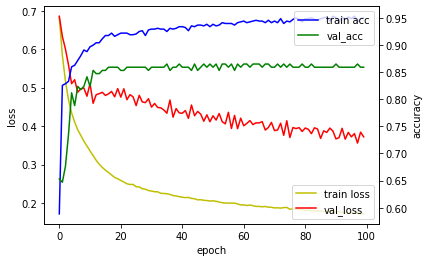

In [47]:
#에폭에 나왔단 로스랑 어큐러씨를 그려본다.(크로스 되는 지점 확인)
import matplotlib.pyplot as plt

fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label = "val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right") #legend 는 범례 

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right") #legend 는 범례 

plt.show()

In [48]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 20, batch_size = 64, verbose = 1)

Epoch 1/20
11/11 [==============================] - 0s 12ms/step - loss: 0.1702 - accuracy: 0.9497 - val_loss: 0.3680 - val_accuracy: 0.8588
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 0.1697 - accuracy: 0.9512 - val_loss: 0.3609 - val_accuracy: 0.8588
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1706 - accuracy: 0.9497 - val_loss: 0.3671 - val_accuracy: 0.8588
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1696 - accuracy: 0.9497 - val_loss: 0.3579 - val_accuracy: 0.8647
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1683 - accuracy: 0.9512 - val_loss: 0.3734 - val_accuracy: 0.8588
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9512 - val_loss: 0.3627 - val_accuracy: 0.8588
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1688 - accuracy: 0.9527 - val_loss: 0.3614 - val_accuracy: 0.8588
Epoch 8/20
11/11 [=

In [53]:
Y_pred  = model.predict(X_test, verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("Y 예측값 : \n", Y_pred[:5])
print("Y 예측 클래스 : \n ", Y_class[:5] )
print("train accuracy : {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy : {:.3f}".format(test_score[0], test_score[1]))

Y 예측값 : 
 [[0.93126047]
 [1.        ]
 [0.0177254 ]
 [0.01244921]
 [0.99973166]]
Y 예측 클래스 : 
  [[1.]
 [1.]
 [0.]
 [0.]
 [1.]]
train accuracy : 0.202
test accuracy : 0.224
